# 4 spin ferromagnetic Heisenberg chain transfer

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
import math

Let's first initialise our system as a circuit of 4 qubits and 4 classic bits.

In [2]:
circuit = QuantumCircuit(4,4) #build circuit with 4 qubit and 4 bits

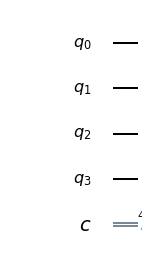

In [3]:
circuit.draw(output = 'mpl')

We want to investigate the transfer of qubit q0 to qubit q3 via the heisenberg interaction. Let's start with the chain $|\uparrow \downarrow \downarrow \downarrow \ \rangle$ and we want the final state to be $|\downarrow \downarrow \downarrow \uparrow \ \rangle$. We represent $|\uparrow \ \rangle$ as $| 0 \rangle$ and $|\downarrow \ \rangle$ as $|1\rangle$.

As the states are all initially 0, we want q1, q2 and q3 to all be 1 to represent our initial state, hence we apply a X gate to all of those to make the state $| 0111 \rangle$.

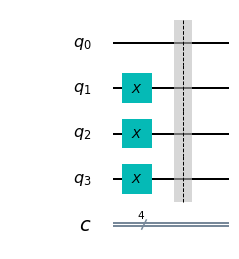

In [4]:
circuit.x([1,2,3])
circuit.barrier()
circuit.draw(output = 'mpl')

Now lets consider adding on the 1 layer of 1st order Suzuki-Trotter to our circuit, with a time variable t.

In [5]:
t = math.pi/16 #set time t

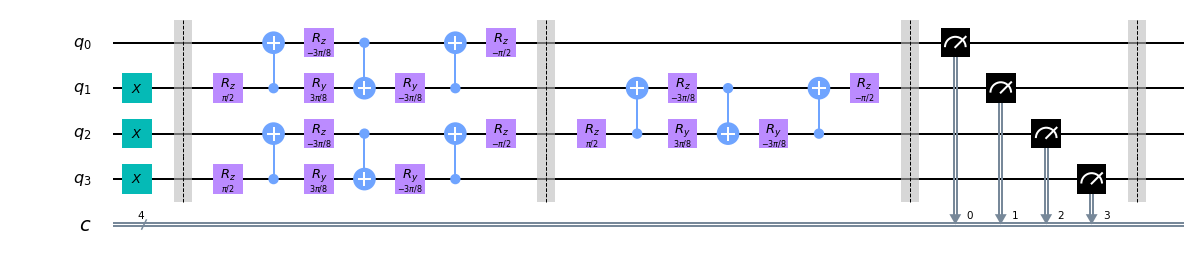

In [74]:
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

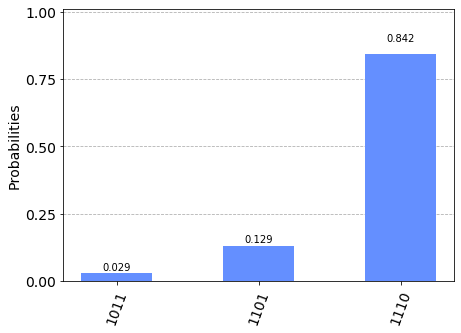

In [75]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### Adding a 2nd layer

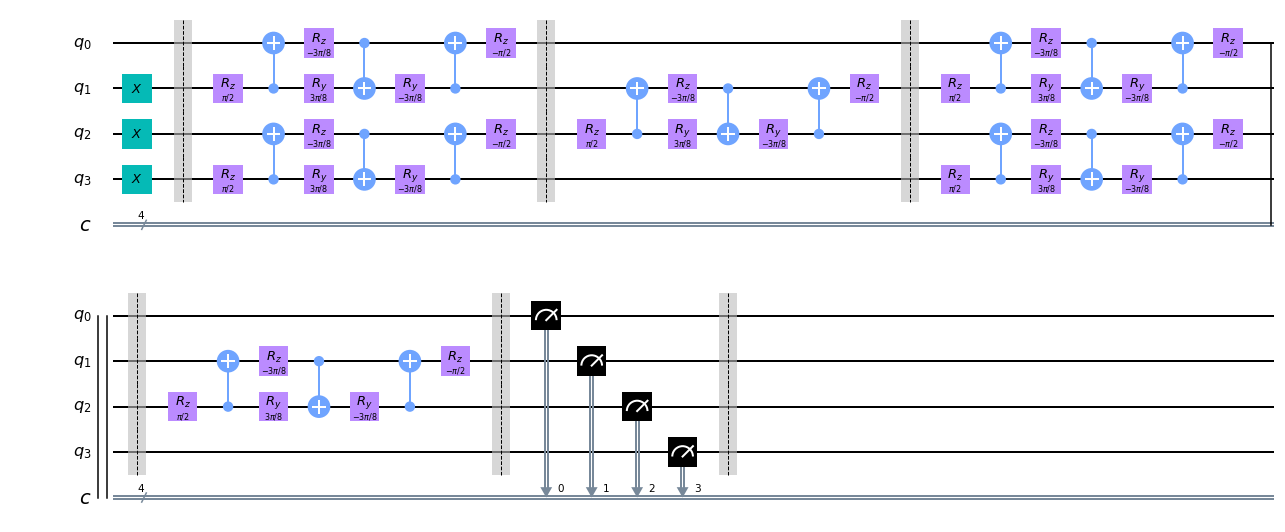

In [76]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

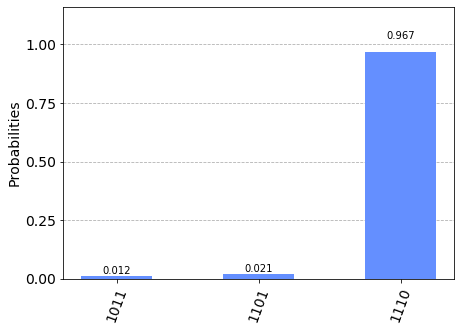

In [77]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 3rd Layer:

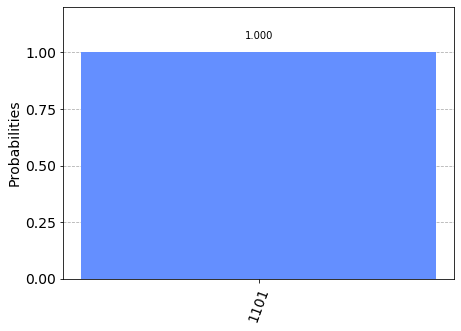

In [60]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 4th Layer:

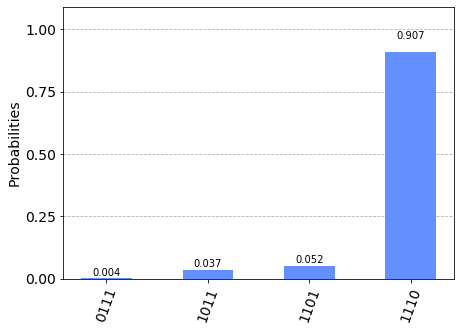

In [13]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 5th Layer:

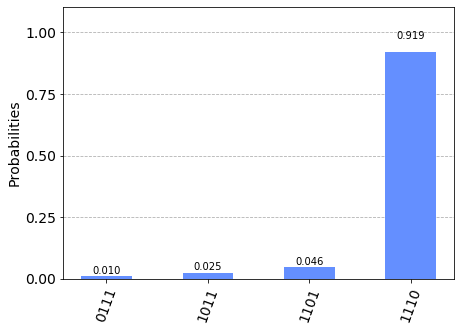

In [14]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 6th Layer:

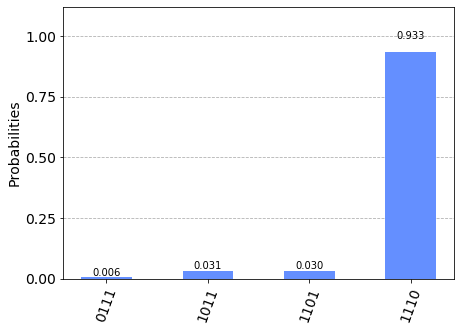

In [16]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 7th Layer:

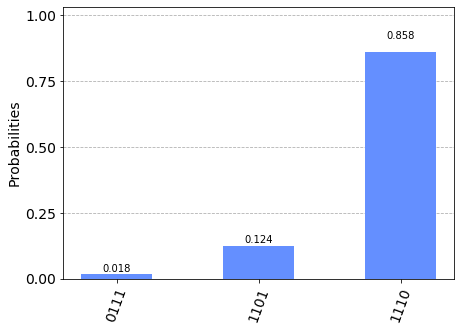

In [17]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 8th Layer:

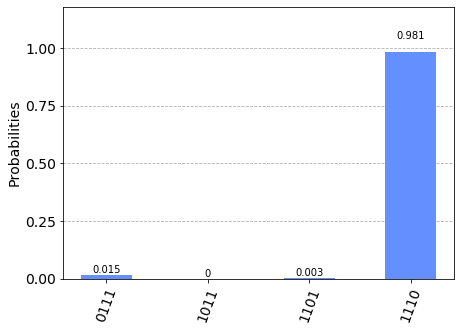

In [19]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 9th Layer:

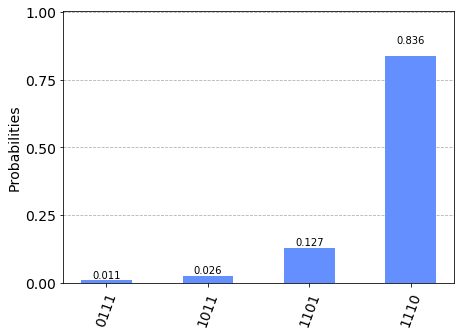

In [21]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 10th Layer:

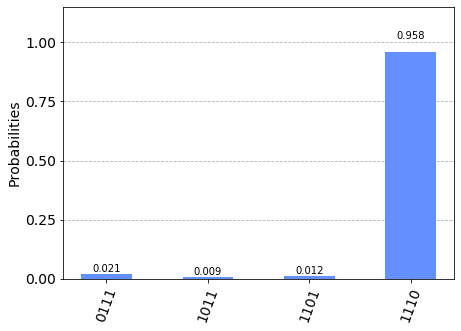

In [24]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 11th Layer:

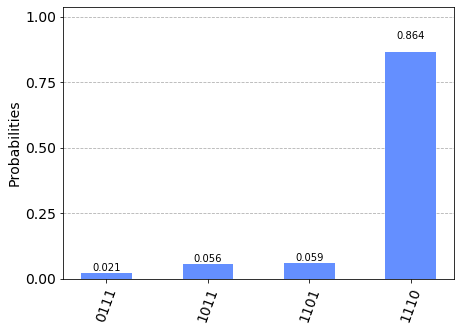

In [25]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 12th Layer:

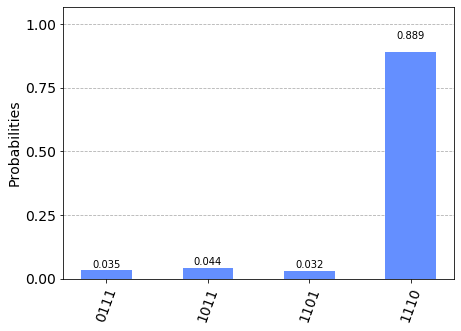

In [26]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.barrier()

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 13 Layer:

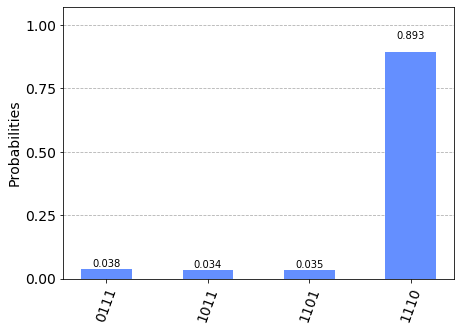

In [29]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 14 Layer:

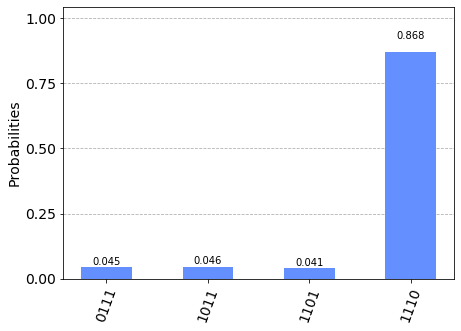

In [30]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 15 Layer:

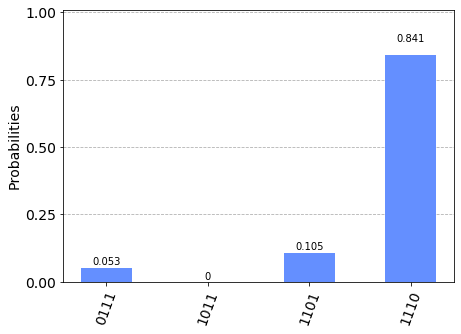

In [31]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 16 Layer:

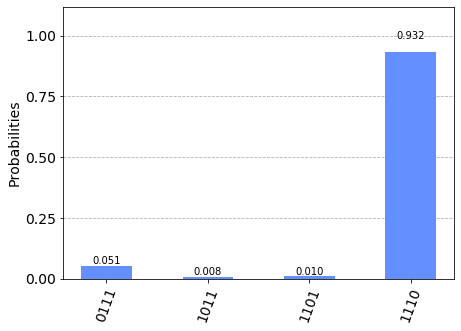

In [32]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 17 Layer:

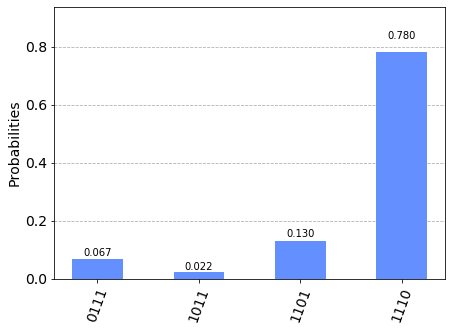

In [33]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [34]:
### 18 Layer:

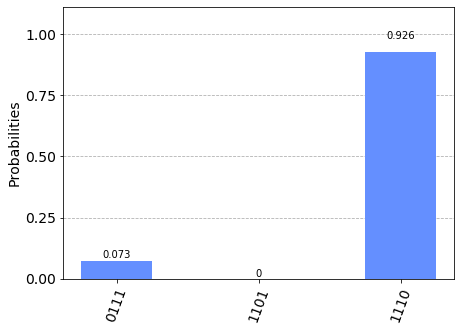

In [35]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 19 Layer:

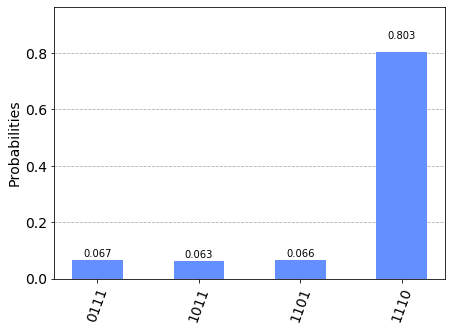

In [37]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 20 Layer:

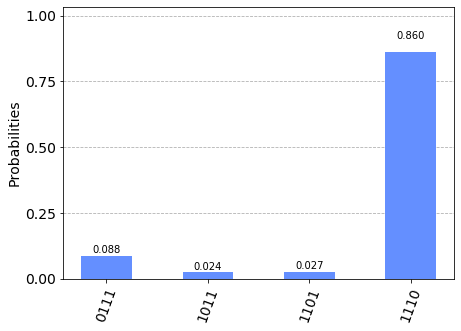

In [38]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 30 Layers:

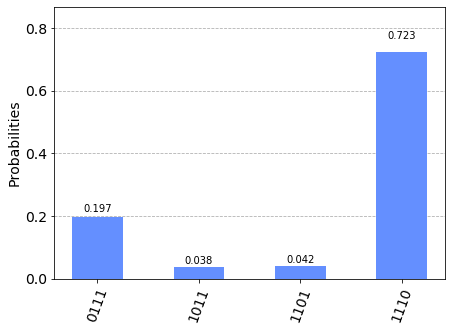

In [39]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 40 Layers:

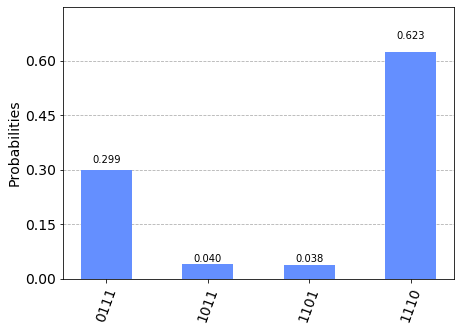

In [40]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 50 Layers:

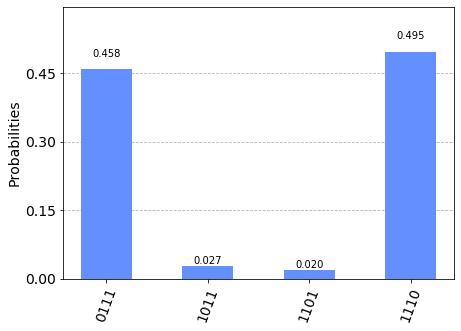

In [41]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 60 Layers:

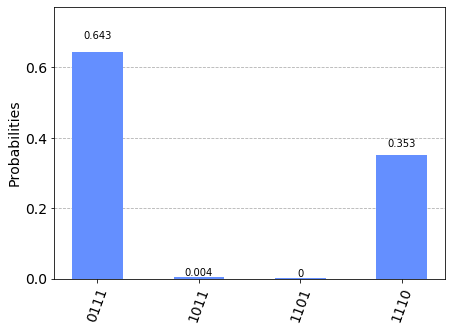

In [42]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 70 Layers:

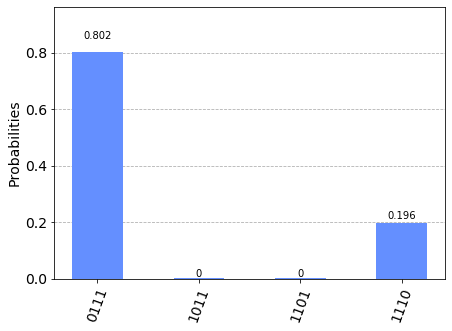

In [43]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 80 Layers:

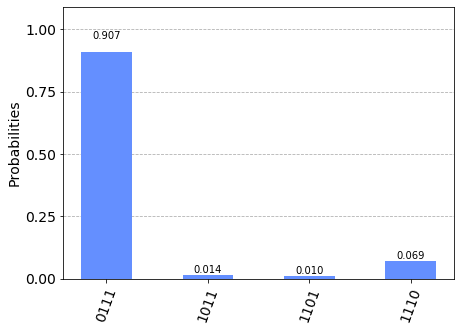

In [45]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 90 Layers:

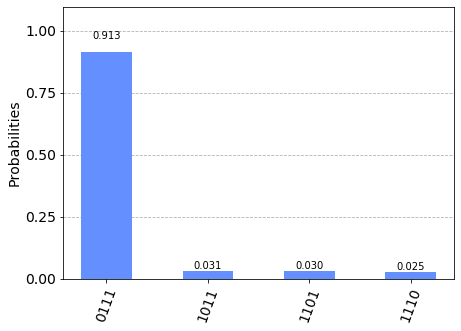

In [47]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### 100 Layers:

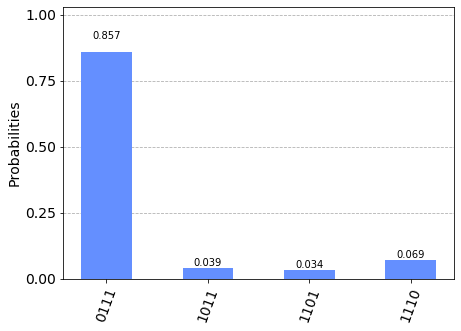

In [7]:
circuit = QuantumCircuit(4,4) 
circuit.x([1,2,3])
circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()
#1
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#2
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#3
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#4
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#5
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#6
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#7
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#8
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#9
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#10
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#11
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#12
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#13
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#14
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#15
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#16
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#17
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#18
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#19
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()

#20
circuit.rz(math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(2*t - math.pi/2, 0)
circuit.ry(math.pi/2 - 2*t, 1)
circuit.cx(0,1)
circuit.ry(2*t - math.pi/2, 1)
circuit.cx(1,0)
circuit.rz(-math.pi/2, 0)

circuit.rz(math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(2*t - math.pi/2, 2)
circuit.ry(math.pi/2 - 2*t, 3)
circuit.cx(2,3)
circuit.ry(2*t - math.pi/2, 3)
circuit.cx(3,2)
circuit.rz(-math.pi/2, 2)

circuit.barrier()

circuit.rz(math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(2*t - math.pi/2, 1)
circuit.ry(math.pi/2 - 2*t, 2)
circuit.cx(1,2)
circuit.ry(2*t - math.pi/2, 2)
circuit.cx(2,1)
circuit.rz(-math.pi/2, 1)

circuit.barrier()


circuit.measure([0,1,2,3],[0,1,2,3])

circuit.draw(output = 'mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### Execute on real Quantum device 

In [8]:
IBMQ.load_account() #load the account
provider = IBMQ.get_provider('ibm-q') 
qcomp = provider.get_backend('ibmq_16_melbourne') #the device we are working with
job = execute(circuit, backend=qcomp) #job is tp execute our circuit

In [10]:
from qiskit.tools.monitor import job_monitor
job_monitor(job) #check the position in queue

Job Status: job incurred error


In [55]:
result = job.result() #get the results
plot_histogram(result.get_counts(circuit))

IBMQJobFailureError: 'Unable to retrieve job result. Job has failed. Use job.error_message() to get more details.'